In [27]:
import pandas as pd
import os
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
import statsmodels.api as sm

## import written functions
from time_acquire import get_items, new_stores, get_stores, get_sales, combined_data, get_germany_power
from time_prepare import make_time, set_time

#### Explore Exercise

Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.


In [2]:
df = combined_data()
df = make_time(df)

df.head()

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,218.40
2013-01-01 00:00:00+00:00,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,1,Tuesday,125.55
2013-01-01 00:00:00+00:00,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,453.60
2013-01-01 00:00:00+00:00,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,294.00


In [3]:
df = df.groupby(['sale_date']).sales_total.sum().reset_index()
df.head()

,sale_date,sales_total
0,2013-01-01 00:00:00+00:00,73844.01
1,2013-01-02 00:00:00+00:00,73570.58
2,2013-01-03 00:00:00+00:00,78169.48
3,2013-01-04 00:00:00+00:00,84467.73
4,2013-01-05 00:00:00+00:00,87621.85


##### Doing train test split with index slicing


In [4]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

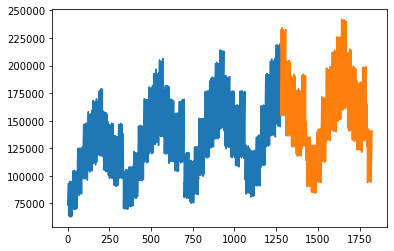

In [5]:
## plotting train and test

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)


In [6]:
train = train.set_index('sale_date') ## <-- setting index to sale date


y= train.sales_total ## <-- making our target variable set
y.head()

sale_date
2013-01-01 00:00:00+00:00    73844.01
2013-01-02 00:00:00+00:00    73570.58
2013-01-03 00:00:00+00:00    78169.48
2013-01-04 00:00:00+00:00    84467.73
2013-01-05 00:00:00+00:00    87621.85
Name: sales_total, dtype: float64

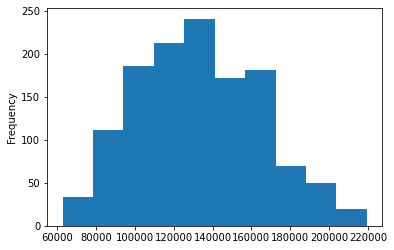

In [7]:
y.plot.hist() ## <-- looking at target variable distributions
plt.show()

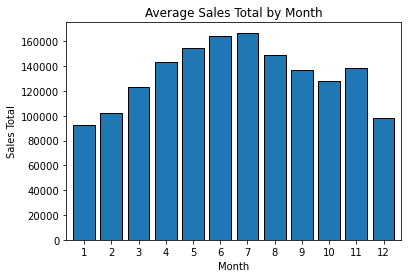

In [8]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.8, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales Total by Month', xlabel='Month', ylabel='Sales Total')
plt.show()

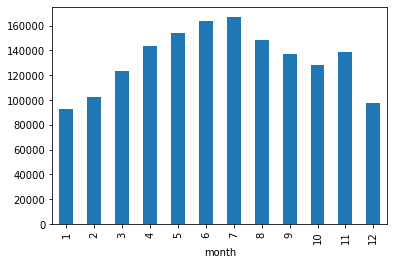

In [9]:
## now looking at grouping by month

train['month'] = train.index.month ## <-- making month the index
train.groupby('month').sales_total.mean().plot.bar() ## <-- plotting
plt.show()

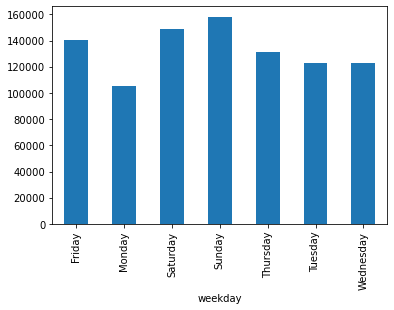

In [10]:
## and now weekday

train['weekday']=train.index.day_name()
train.groupby('weekday').sales_total.mean().plot.bar()
plt.show()

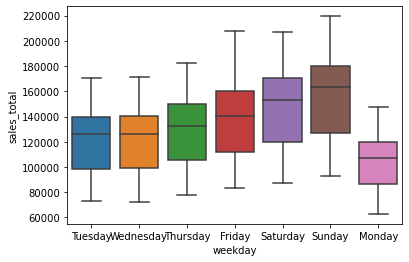

In [11]:
## looking at boxplot of weekday and sales_total no hue
sns.boxplot(data=train, x='weekday',y='sales_total')
plt.show()

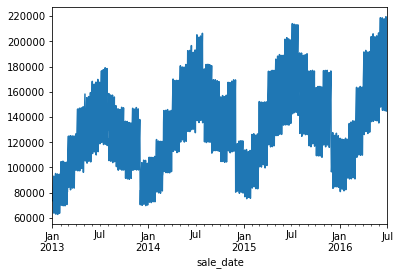

In [12]:
y.plot()
plt.show()## <-- looking at our target variable

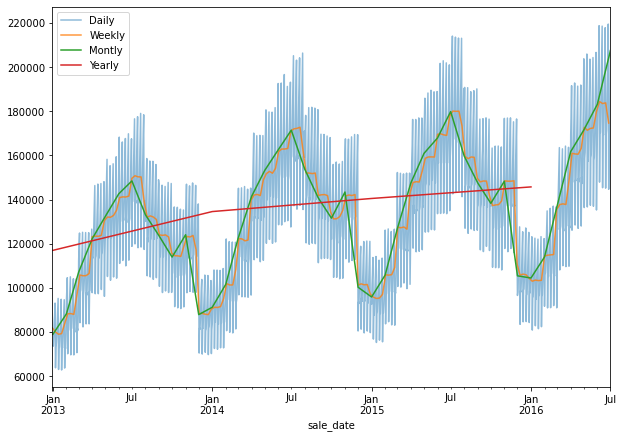

In [13]:
## Looking at the different aggregates using mean
plt.figure(figsize=(10,7))
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()
plt.show()

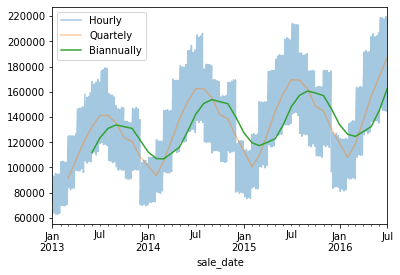

In [14]:
y.plot(alpha = .4, label='Hourly')
y.resample('M').mean().rolling(3).mean().plot(alpha=.4, label='Quartely')
y.resample('M').mean().rolling(6).mean().plot(alpha=9, label='Biannually')
plt.legend()
plt.show()

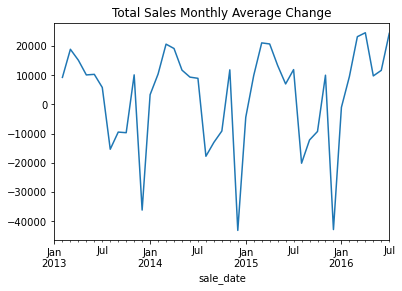

In [15]:
y.resample('M').mean().diff().plot(title='Total Sales Monthly Average Change')
plt.show()

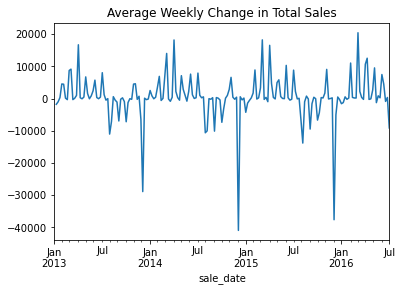

In [17]:
y.resample('W').mean().diff().plot(title='Average Weekly Change in Total Sales')
plt.show()

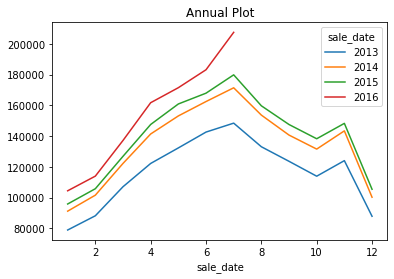

In [22]:
## Looking at the different years plotted 
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Annual Plot')
plt.show()

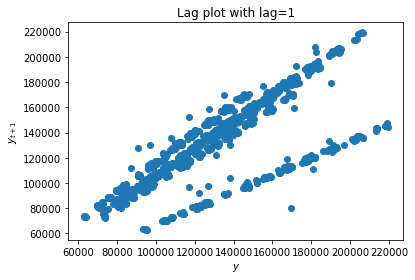

In [23]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')
plt.show()

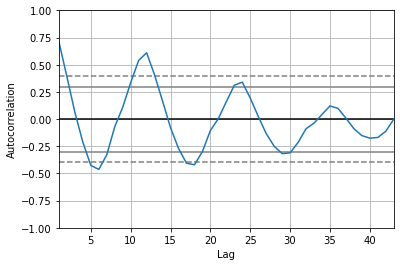

In [25]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('M').mean())
plt.show()

In [28]:
y = train.sales_total.resample('M').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-31 00:00:00+00:00,78947.361290,NaN,-39639.550997,NaN
2013-02-28 00:00:00+00:00,88205.927500,NaN,-29250.221824,NaN
2013-03-31 00:00:00+00:00,107090.825161,NaN,-9445.523172,NaN
2013-04-30 00:00:00+00:00,122230.041000,NaN,9475.026870,NaN
2013-05-31 00:00:00+00:00,132331.561290,NaN,20999.628955,NaN


In [31]:
## using cut to makes a sales_total bin

train = train.resample('D').mean()

train['sales_bin'] = pd.qcut(train.sales_total, 3, labels=['low','medium','high'])
train.groupby('sales_bin').mean()

,sales_total,month
sales_bin,,
low,97828.398052,5.117371
medium,131801.070376,6.615023
high,168858.169554,6.553991


Text(0, 0.5, '% of days in the month')

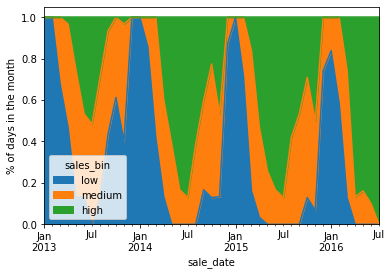

In [32]:
(train.groupby('sales_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of days in the month')


[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'September'),
 Text(9, 0, 'October'),
 Text(10, 0, 'November'),
 Text(11, 0, 'December')]

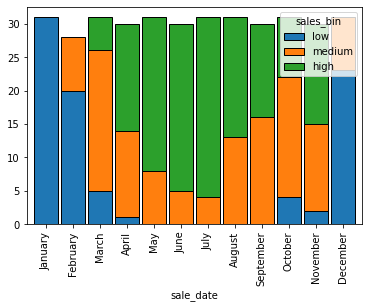

In [33]:

ax = (train['2015']
 .groupby('sales_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels)